In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot
from math import sqrt
from pytz import timezone

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, Normalizer, RobustScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.utils.np_utils import to_categorical
from keras import optimizers

Using TensorFlow backend.


In [3]:
np.random.seed(7)

In [4]:
def get_X_data():
    import dovahkiin as dk
    dp = dk.DataParser()
    X = dp.get_data("cu")
    return X

In [5]:
def get_y_data():
    y = pd.read_csv("93013_20170705_ALLSig.csv", index_col=[0], names=["date_time", "sig"], parse_dates=["date_time"])
    y = y.tz_localize(timezone("Asia/Shanghai"))
    return y

In [93]:
X = get_X_data()
y = get_y_data()

In [85]:
# Resample into 1 day frequency
X = X.asfreq("1D").dropna()
y = y.asfreq("1D").dropna()

In [94]:
# Resample into 5 minutes frequency
X = X.asfreq("5T").dropna()
y = y.asfreq("5T").dropna()

In [95]:
import statsmodels.api as sm

In [101]:
decompfreq = int(60 / 5 * 4)

In [102]:
res = sm.tsa.seasonal_decompose(X["close"], model="multiplicative", freq=decompfreq)

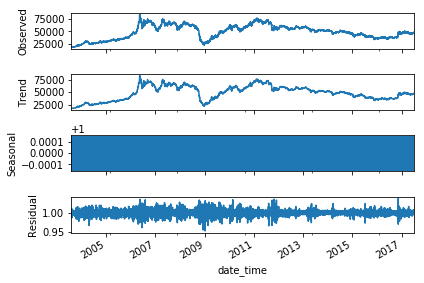

In [103]:
res.plot()

In [61]:
X.plot()

In [59]:
pyplot.clf()

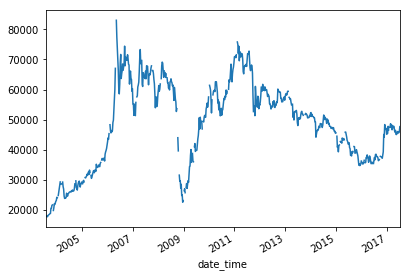

In [62]:
pyplot.show()

In [ ]:
sm.tsa.ARMA()